# IMPALA Results

In [1]:
import sys
sys.path.insert(0, "../")
from  Utils.plot import plot_IMPALA_session
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import pandas as pd

## Loading metadata

In [2]:
def find_xpid_from_mapname(map_name, load_dir='../logs/torchbeast'):
    all_files = os.listdir(load_dir)
    xpid_files = [f for f in all_files if 'torchbeast' in f]
    matching_xpids = []
    for xpid in xpid_files:
        with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
            data = json.load(json_file)
            flags = data['args']
        if flags['map_name'] == map_name:
            print("Matchig xpid: ", xpid)
            print("Map name: ", flags['map_name'])
            print("Batch size: ", flags['batch_size'])
            print("Total steps: ", flags['total_steps'],'\n')
            matching_xpids.append(xpid)
    return matching_xpids

In [3]:
# search for xpids starting from the map name
game_names = {1:'MoveToBeacon',
              2:'CollectMineralShards',
              3:'DefeatRoaches',
              4:'FindAndDefeatZerglings',
              5:'DefeatZerglingsAndBanelings',
              6:'CollectMineralsAndGas',
              7:'BuildMarines'
              }
map_name = game_names[2]
matching_xpids = find_xpid_from_mapname(map_name)
matching_xpids

Matchig xpid:  torchbeast-20200724-153342
Map name:  CollectMineralShards
Batch size:  22
Total steps:  6000 



['torchbeast-20200724-153342']

In [4]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200724"
hms = "153342"
load_dir = "../logs/torchbeast"
xpid = 'torchbeast-%s-%s'%(ymd,hms)
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [5]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])

Map name:  CollectMineralShards
Batch size:  22
Total steps:  6000


## Loading logs

In [6]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)

In [7]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.595594e+09,0,16064.385742,0.000000,14840.376953,1224.340210,-0.331510
1,1,1.595594e+09,60,-560.144531,20.200001,-655.857239,96.029190,-0.316491
2,2,1.595594e+09,120,12773.631836,19.000000,10787.070312,1986.923828,-0.362526
3,3,1.595594e+09,180,-6033.235352,15.900001,-8605.945312,2573.091553,-0.381626
4,4,1.595594e+09,240,2626.789062,16.000000,1842.034790,785.122864,-0.368593
...,...,...,...,...,...,...,...,...
96,96,1.595594e+09,5760,1687.751953,18.000000,1363.576416,324.471008,-0.295398
97,97,1.595594e+09,5820,1499.284790,18.500000,710.763794,788.836914,-0.315973
98,98,1.595594e+09,5880,1017.885132,16.000000,46.855461,971.388184,-0.358515
99,99,1.595594e+09,5940,509.497040,21.800001,-469.199768,979.110962,-0.414151


In [8]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

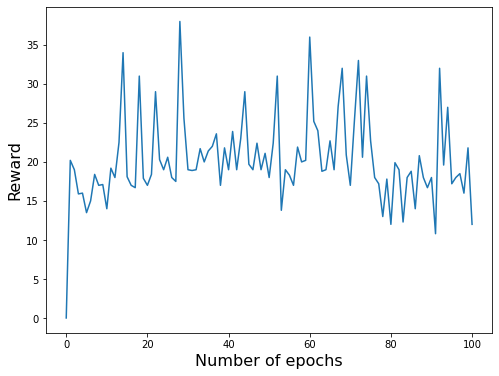

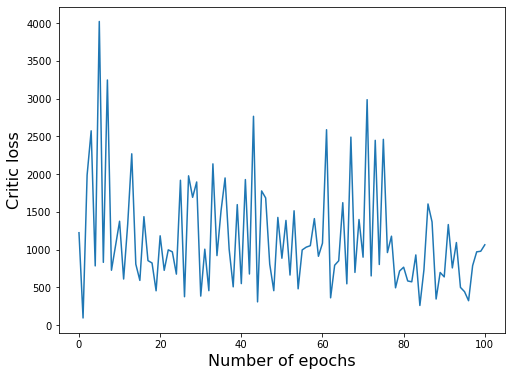

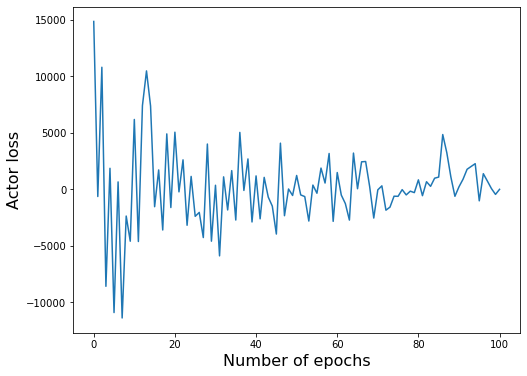

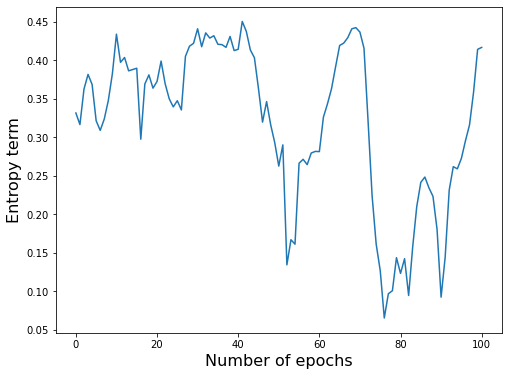

In [9]:
plot_IMPALA_session(results)